#### Importing Required Library

In [1]:
import os
import sys
import datetime
import time
import math
import json
from pathlib import Path

import numpy as np
from PIL import Image
from torch import optim
import torch
import torch.nn as nn
import torch.distributed as dist`
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision import models as torchvision_models
from sklearn import metrics
import matplotlib.pyplot as plt
import torchvision

#### Mounting my drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Providing datapath

In [ ]:
data_path = '/content/drive/MyDrive/Dataset/'
batch_size = 32

#### Defining data transforms and data loader

In [ ]:
transform = transforms.Compose([
        transforms.Resize(256, interpolation=3),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    ])

dataset_train = datasets.ImageFolder(os.path.join(data_path, "drink"), transform=transform)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=batch_size,
    shuffle=True
)

print(f"Data loaded with {len(dataset_train)} train imgs.")


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


Data loaded with 518 train imgs.


#### Defining Model

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.cnn_layers = nn.Sequential(
            # Defining a 2D convolution layer
            nn.Conv2d(3, 10, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            # Defining another 2D convolution layer
            nn.Conv2d(10, 15, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(15),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(15, 10, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(10),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
      )

        self.linear_layers = nn.Sequential(
            
          nn.Linear(10 * 28 * 28, 3)
      )

  # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [ ]:
model = Net()
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=7840, out_features=3, bias=True)
  )
)


#### Setting up the optimizer and loss function

In [ ]:
# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()

#### Define epoch and train the model

In [ ]:
epoch = 50

In [ ]:
model.train()
for i in range(epoch):
    running_loss = 0
    for images, labels in train_loader:
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        
        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(train_loader)))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1 - Training loss: 17.70294719583848
Epoch 2 - Training loss: 5.39421540148118
Epoch 3 - Training loss: 2.791917793891009
Epoch 4 - Training loss: 1.6851297003381394
Epoch 5 - Training loss: 1.1528698801994324
Epoch 6 - Training loss: 0.8893949459580814
Epoch 7 - Training loss: 0.8194494878544527
Epoch 8 - Training loss: 0.9048212205662447
Epoch 9 - Training loss: 0.7461813951239866
Epoch 10 - Training loss: 0.5868288506479824
Epoch 11 - Training loss: 0.5389867091880125
Epoch 12 - Training loss: 0.5056764395797954
Epoch 13 - Training loss: 0.4280119678553413
Epoch 14 - Training loss: 0.40128494010252114
Epoch 15 - Training loss: 0.4047039720941992
Epoch 16 - Training loss: 0.4608104167615666
Epoch 17 - Training loss: 0.5187408827683505
Epoch 18 - Training loss: 0.41501541435718536
Epoch 19 - Training loss: 0.2674281899543369
Epoch 20 - Training loss: 0.23686854870003812
Epoch 21 - Training loss: 0.21487935676294215
Epoch 22 - Training loss: 0.17152070385568283
Epoch 23 - Trainin

#### Setting model in eval mode and checking model accuracy

In [ ]:
model.eval()

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=7840, out_features=3, bias=True)
  )
)

In [ ]:
# getting predictions on training set and measuring the performance
l = []
p = []
for images,labels in train_loader:
    for i in range(len(labels)):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        img = images[i].view(1, 3, 224, 224)
        with torch.no_grad():
            logps = model(img)


        ps = torch.exp(logps)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        true_label = true_label.item()
        l.append(true_label)
        p.append(pred_label)

print("Number Of Images Tested =", len(l))
print("\nModel Accuracy = {:.3f}%".format(100*metrics.accuracy_score(l, p)) )

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Number Of Images Tested = 518

Model Accuracy = 94.402%


#### Saving model for future use

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Dataset/drink_model.pth')

#### Testing the saved model (no need to run)

In [ ]:
test_model = Net()
test_model.load_state_dict(torch.load('/content/drive/MyDrive/Dataset/drink_model.pth'))
if torch.cuda.is_available():
    test_model = test_model.cuda()
test_model.eval()

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(10, 15, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(15, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=7840, out_features=3, bias=True)
  )
)

In [ ]:
# getting predictions on test set and measuring the performance
l = []
p = []
for images,labels in train_loader:
    for i in range(len(labels)):
        if torch.cuda.is_available():
            images = images.cuda()
            labels = labels.cuda()
        img = images[i].view(1, 3, 224, 224)
        with torch.no_grad():
            logps = test_model(img)


        ps = torch.exp(logps)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        true_label = true_label.item()
        l.append(true_label)
        p.append(pred_label)

print("Number Of Images Tested =", len(l))
print("\nModel Accuracy = {:.3f}%".format(100*metrics.accuracy_score(l, p)) )

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Number Of Images Tested = 518

Model Accuracy = 94.402%


#### Function to plot the training images

In [ ]:
from matplotlib.pyplot import imshow
def display_image(img):
  img = img.cpu()
  img = img.squeeze(0)
  img = img.permute(1,2,0)
  img = (img-img.min())/(img.max() - img.min())
  img = np.array(img*255, dtype=np.uint8)
  img = Image.fromarray(img)
  imshow(img)

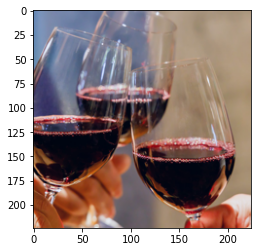

In [ ]:
# getting predictions on test set and measuring the performance
l = []
p = []
for images,labels in train_loader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
      images = images.cuda()
      labels = labels.cuda()
    img = images[i].view(1, 3, 224, 224)
    with torch.no_grad():
      logps = test_model(img)


    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    true_label = true_label.item()
    if(true_label == 2):
      display_image(img)
      break
  break